In [1]:
using AutomaticSingleCellToolbox,Plots,ColorSchemes,DataFrames

In [2]:
# Download https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
# tar xzvf pbmc3k_filtered_gene_bc_matrices.tar.gz
obj = Read10X("filtered_gene_bc_matrices/hg19";min_cells=3)
FeaturePercentage!(obj)

[ Info: Currently, only support Cellranger's result!!!
[ Info: Reading matrix directory ...
[ Info: Generating matrix ...
[ Info: Reading barcodes ...
[ Info: Reading features/genes ...
[ Info: Gathering basic information
[ Info: There are some duplicated gene names! Add '.numbers' automatically!


"Finished!"

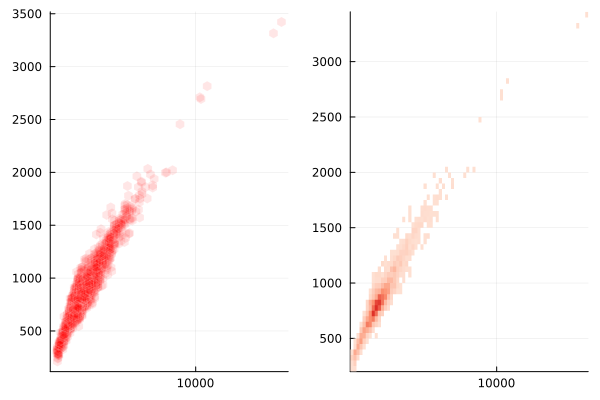

In [3]:
QcPlot(obj)

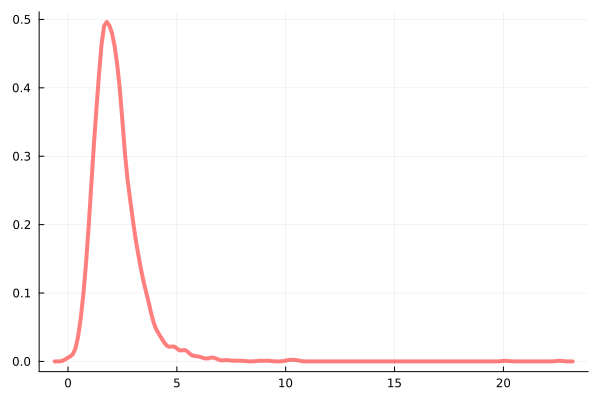

In [4]:
QcPlot(obj;obs_name="percentage_mt")

[ Info: Filtering cells by percentage_mt ...
[ Info: Linear regression for threshold ...
[ Info: The cutoff is about 5.06
[ Info: Filtering cells by the cluster of UMI/Feature


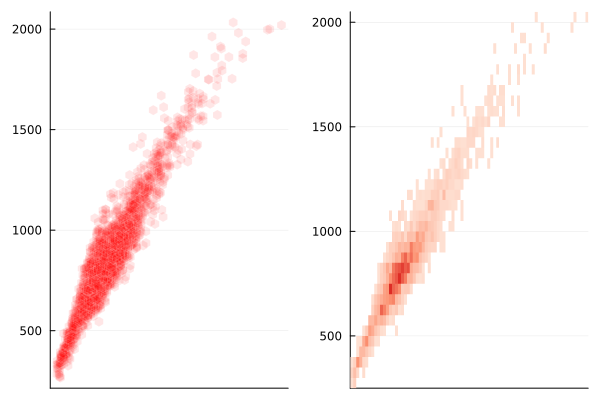

In [3]:
AutoFilter!(obj)
QcPlot(obj)

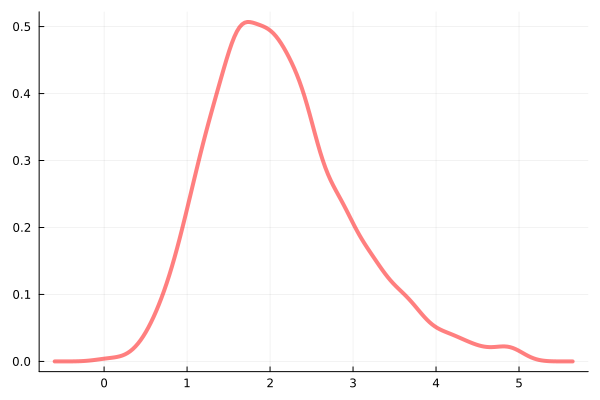

In [6]:
QcPlot(obj;obs_name="percentage_mt")

In [4]:
NormalizeData!(obj)
SelectHVG!(obj)

[ Info: 2000 HVGs were selected automatically!


"Finished!"

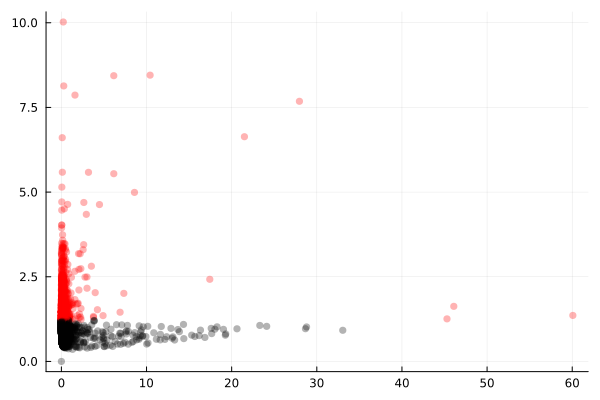

In [10]:
color = repeat(["black"],size(obj.dat["raw_dat"],1))
color[obj.meta["hvg_index"]] .= "red"
plot(obj.meta["hvg_mean"],obj.meta["hvg_var_std"],st=:scatter,mc=color,msc=color,ms=4,ma=0.3,legend=false)

In [5]:
PCA!(obj)
RunUMAP!(obj)
RunTSNE!(obj)
Clustering!(obj)

[ Info: Scaling data...
[ Info: Running PCA ...
[ Info: Linear regression for Elbow threshold ...
[ Info: We recommend top 10 PCs for downstream analysis automatically!
[ Info: Running UMAP...
[ Info: Running FIt-SNE ...


=============== t-SNE v1.2.1 ===============
fast_tsne data_path: ./tsne_in_2023.12.25.14.52.16-46183.dat
fast_tsne result_path: ./tsne_out_2023.12.25.14.52.16-46183.dat
fast_tsne nthreads: 64
Read the following parameters:
	 n 2635 by d 10 dataset, theta 0.500000,
	 perplexity 30.000000, no_dims 2, max_iter 750,
	 stop_lying_iter 250, mom_switch_iter 250,
	 momentum 0.500000, final_momentum 0.800000,
	 learning_rate 219.583333, max_step_norm 5.000000,
	 K -1, sigma -1.000000, nbody_algo 2,
	 knn_algo 1, early_exag_coeff 12.000000,
	 no_momentum_during_exag 0, n_trees 50, search_k 4500,
	 start_late_exag_iter -1, late_exag_coeff -1.000000
	 nterms 3, interval_per_integer 1.000000, min_num_intervals 50, t-dist df 1.000000
Read the 2635 x 10 data matrix successfully. X[0,0] = 4.735402
Will use momentum during exaggeration phase
Computing input similarities...
Using perplexity, so normalizing input data (to prevent numerical problems)
Using perplexity, not the manually set kernel width.  

[ Info: Max modularity: 0.93487555
[ Info: Max modularity: 0.90918577
[ Info: Max modularity: 0.8883674
[ Info: Max modularity: 0.87166995
[ Info: Recommended resolution is 0.4


"Finished!"

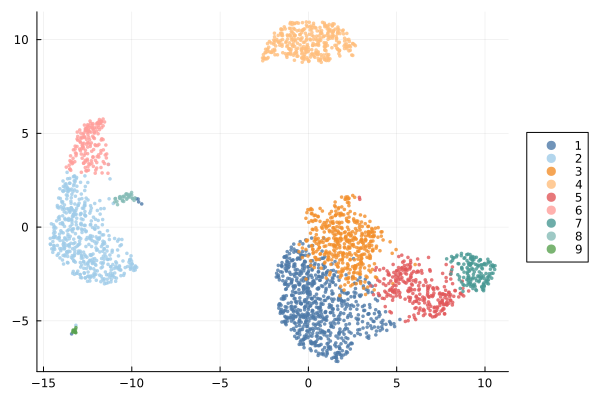

In [6]:
clusters = obj.meta["clusters_latest"]
plot(obj.meta["umap"][:,1],obj.meta["umap"][:,2],st=:scatter,mc=ColorSchemes.tableau_20[clusters],msc=ColorSchemes.tableau_20[clusters],group=clusters,ms=2,ma=0.8,legend=:outerright)

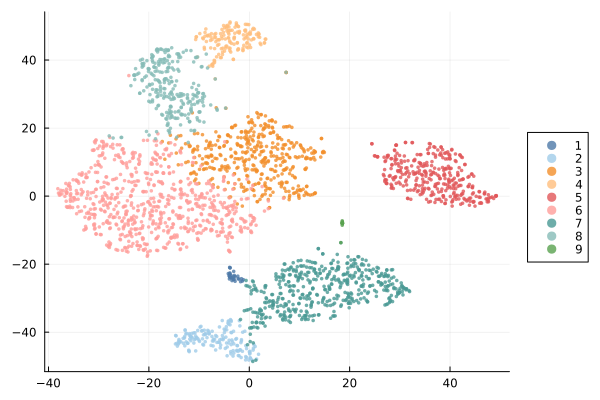

In [13]:
plot(obj.meta["tsne"][:,1],obj.meta["tsne"][:,2],st=:scatter,mc=ColorSchemes.tableau_20[clusters],msc=ColorSchemes.tableau_20[clusters],group=clusters,ms=2,ma=0.8,legend=:outerright)

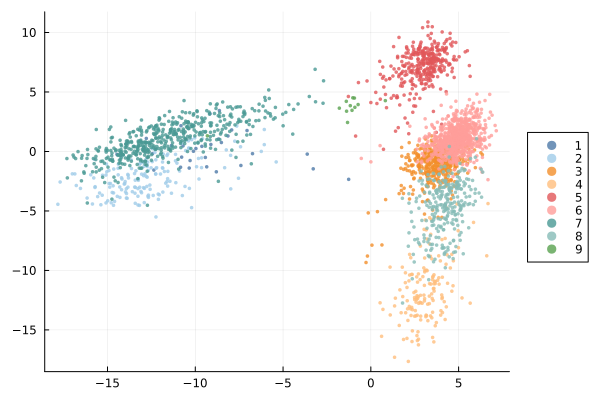

In [14]:
plot(obj.meta["pca"][:,1],obj.meta["pca"][:,2],st=:scatter,mc=ColorSchemes.tableau_20[clusters],msc=ColorSchemes.tableau_20[clusters],group=clusters,ms=2,ma=0.8,legend=:outerright)

In [7]:
DE!(obj)

"Finished!"

In [33]:
groupby(obj.meta["clusters_latest_DE"],:group) |> 
    x -> combine(x) do y
        first(y,10)
end

90×5 DataFrame
 Row │ group   gene        score     pct1      log2fc   
     │ String  String      Float64   Float64   Float64  
─────┼──────────────────────────────────────────────────
   1 │ 1       FCER1A      0.651802  0.8       3.9161
   2 │ 1       SERPINF1    0.572449  0.533333  1.78202
   3 │ 1       CLEC10A     0.41819   0.7       2.40156
   4 │ 1       ENHO        0.388413  0.433333  1.37171
   5 │ 1       CLIC2       0.387936  0.3       0.698222
   6 │ 1       CLEC4C      0.365745  0.2       1.00661
   7 │ 1       SCT         0.308926  0.1       0.660998
   8 │ 1       LRRC26      0.300395  0.1       0.583853
   9 │ 1       DNASE1L3    0.293189  0.133333  1.82014
  10 │ 1       LILRA4      0.288694  0.166667  1.61204
  11 │ 2       CDKN1C      0.596082  0.512346  1.62703
  ⋮  │   ⋮         ⋮          ⋮         ⋮         ⋮
  81 │ 9       GP9         0.906614  0.916667  5.11242
  82 │ 9       PF4         0.87638   1.0       7.31713
  83 │ 9       AP001189.4  0.87435   0.833333  3.587
  84 │ 9       TMEM40      0.853443  0.833333  4.15862
  85 │ 9       ITGA2B      0.851496  0.833333  4.66677
  86 │ 9       GNG11       0.829122  0.916667  6.65264
  87 │ 9       PTCRA       0.817471  0.833333  4.89056
  88 │ 9       PPBP        0.801023  1.0       8.61087
  89 │ 9       SDPR        0.788132  0.916667  6.28833
  90 │ 9       TREML1      0.772471  0.75      4.84801
                                         69 rows omitted

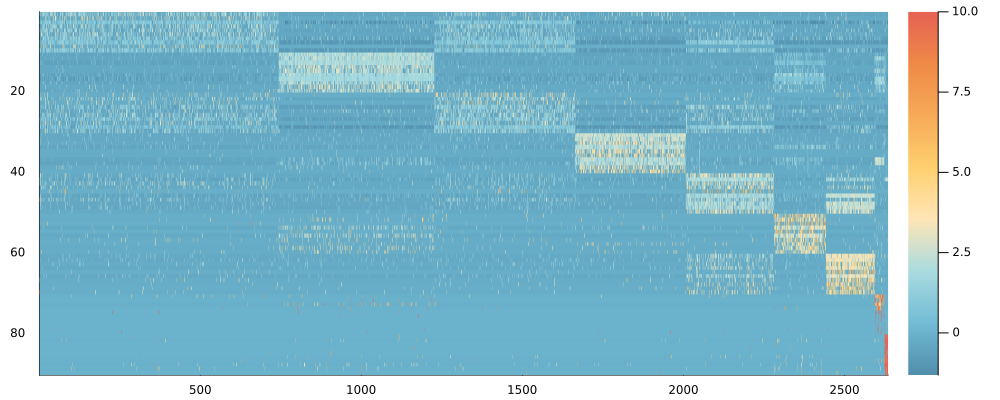

In [61]:
gid = groupby(obj.meta["clusters_latest_DE"],:group) |> x -> combine(x,:gene => y -> first(y,10)) |> x -> indexin(unique(x.gene_function),obj.var.name)
N = maximum(obj.meta["clusters_latest"])
cid = vcat([ findall(x -> x == i,obj.meta["clusters_latest"]) for i in 1:N ]...)
g = obj.dat["scale_dat"][gid,cid] |> x -> heatmap(x;color=ColorSchemes.Hiroshige[8:-1:1],yflip=true,size=(1000,400))
# g = obj.dat["scale_dat"][gid,cid] |> x -> heatmap(x;color=ColorSchemes.vik50[15:49],yflip=true,size=(1000,400))